# 1. CNN 기본 동작에 대해서 단계별로 구현하시오


###### 1. 예제로 사용할 이미지를 불러옵니다. 
###### (경로 : "dataset/bird_pic_by_benjamin_planche.png")

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras import datasets, layers, models, losses

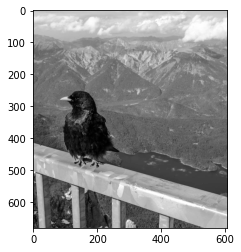

In [3]:
PATH = "./dataset/bird_pic_by_benjamin_planche.png"

image_pil = Image.open(PATH)
image = np.array(image_pil)

plt.imshow(image, 'gray')
plt.show()

###### 2. 해당 이미지를 Tensorflow로 작업하기 위해 
###### 'Tensor' 이미지로 변환합니다.

In [4]:
print("Tensor shape: {}".format(image.shape))

Tensor shape: (680, 608)


###### 3. Tensorflow 작업은 배치된 이미지를 사용합니다. 따라서 
###### (B, H, W, D) 형태를 가지는 단일 이미지 배치로 변환 합니다.

In [5]:
image = tf.reshape(image, [1, 680, 608])
image = tf.cast(image, tf.float32)
print("Tensor shape: {}".format(image.shape))

Tensor shape: (1, 680, 608)


###### 4. 입력된 이미지는 흑백이며, 단일채널을 가지기 때문에 
###### Tensor를 확장하여 단일 채널로 정의합니다.

In [6]:
image = tf.reshape(image, [1, 680, 608, 1])
print("Tensor shape: {}".format(image.shape))

Tensor shape: (1, 680, 608, 1)


###### 5. tf.constant를 활용하여 3 X 3 필터를 정의하세요
###### (Gaussian blur).

In [7]:
kernel = tf.constant([[1/16, 2/16, 1/16],
                      [2/16, 4/16, 2/16],
                      [1/16, 2/16, 1/16]], dtype=tf.float32)
print("kernel shape: {}".format(kernel.shape))

kernel shape: (3, 3)


###### 6. Convolution의 'filter'의 형태는 (k, k, D, N) 여야 합니다. 
###### 해당문제는 D = 1 and N = 1 정의되있으며 명시적으로 
###### 채널을 확장하세요

In [8]:
kernel = tf.reshape(kernel, shape=[3, 3, 1, 1])
print("kernel shape: {}".format(kernel.shape))

kernel shape: (3, 3, 1, 1)


###### 7. "tf.nn.conv2d()" 를 활용하여 정의한 필터를 적용하여 
###### 이미지를 출력합니다.

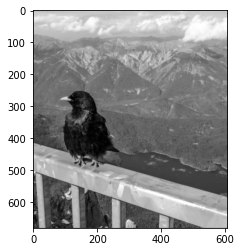

In [9]:
filter_result = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding="SAME")
filter_result = filter_result[0, 0:680, 0:608, 0]

image2 = np.array(filter_result)

plt.imshow(image2, 'gray')
plt.show()

###### 8. 앞서 적용한 Gaussianfilter와 마찬가지로 contour 
###### derection를 만들어서 정의해 보세요.

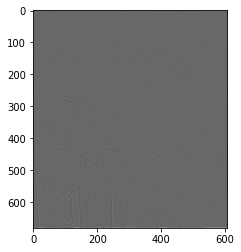

In [10]:
kernel2 = tf.constant([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]], dtype=tf.float32)

kernel2 = tf.reshape(kernel2, shape=[3, 3, 1, 1])

filter_result = tf.nn.conv2d(image, kernel2, strides=[1, 1, 1, 1], padding="SAME")
filter_result = filter_result[0, 0:680, 0:608, 0]

image3 = np.array(filter_result)

plt.imshow(image3, 'gray')
plt.show()

###### 9. tf.nn.~ 함수를 이용하여 average-pooling을 정의해보고 
###### 각 이미지를 출력해보세요

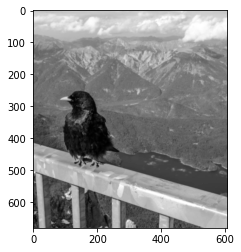

In [11]:
filter_result = tf.nn.avg_pool(image, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding="SAME")
filter_result = filter_result[0, 0:680, 0:608, 0]

image4 = np.array(filter_result)

plt.imshow(image4, 'gray')
plt.show()

###### 10. max-pooling을 정의해보고 이 경우 커널사이즈를 [2,2]와 [10,10]을 나누어서 출력해보세요

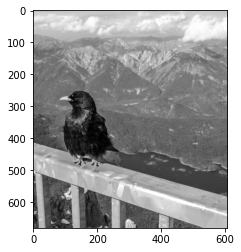

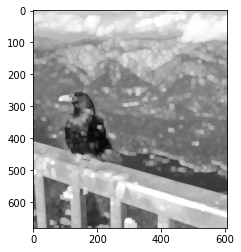

In [12]:
filter_result = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="SAME")
filter_result = filter_result[0, 0:680, 0:608, 0]

image5 = np.array(filter_result)

plt.imshow(image5, 'gray')
plt.show()

filter_result = tf.nn.max_pool(image, ksize=[1, 10, 10, 1], strides=[1, 1, 1, 1], padding="SAME")
filter_result = filter_result[0, 0:680, 0:608, 0]

image6 = np.array(filter_result)

plt.imshow(image6, 'gray')
plt.show()

# 2. 주어진 조건에 따라 네트워크를 설계하시오.

(조건 1 : MNIST 데이터베이스)

(조건 2 : LeNet-5 모델)

###### 2.1 순차형(Sequential) API or 함수형(The functional) API 형식으로 설계하시오.

In [13]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________

###### 2.2 모델 서브클래싱(subclassing) API 형식으로 설계하시오.

In [14]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

class SubModel(tf.keras.Model):  
  def __init__(self):
    super(SubModel, self).__init__()
    self.conv1 = layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:])
    self.conv2 = layers.Conv2D(16, 5, activation='tanh')
    self.conv3 = layers.Conv2D(120, 5, activation='tanh')
    self.pool = layers.AveragePooling2D(2)
    self.activation = layers.Activation('sigmoid')
    self.flatten = layers.Flatten()
    self.dense1 = layers.Dense(84, activation='tanh')
    self.dense2 = layers.Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.pool(x)
    x = self.activation(x)
    x = self.conv2(x)
    x = self.pool(x)
    x = self.activation(x)
    x = self.conv3(x)    
    x = self.flatten(x)
    x = self.dense1(x)
    return self.dense2(x)

model = SubModel()

model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 38s 41ms/step - loss: 1.2322 - accuracy: 0.5639 - val_loss: 0.2753 - val_accuracy: 0.9330
Epoch 2/40
907/907 [==============================] - 36s 40ms/step - loss: 0.3280 - accuracy: 0.8984 - val_loss: 0.2118 - val_accuracy: 0.9445
Epoch 3/40
907/907 [==============================] - 37s 40ms/step - loss: 0.2495 - accuracy: 0.9203 - val_loss: 0.1337 - val_accuracy: 0.9660
Epoch 4/40
907/907 [==============================] - 37s 41ms/step - loss: 0.2034 - accuracy: 0.9360 - val_loss: 0.1211 - val_accuracy: 0.9640
Epoch 5/40
907/907 [==============================] - 36s 40ms/step - loss: 0.1740 - accuracy: 0.9462 - val_loss: 0.0974 - val_accuracy: 0.9700
Epoch 6/40
907/907 [==============================] - 35s 39ms/step - loss: 0.1496 - accuracy: 0.9528 - val_loss: 0.1147 - val_accuracy: 0.9650
Epoch 7/40
907/907 [==============================] - 36s 39ms/step - loss: 0.1370 - accuracy: 0.9558 - val_loss: 0.1216 - val_accuracy:

# 3. 주어진 조건에 대해서 가장 적합한 최적화 방식(optimizers)을 비교하시오

(조건 1 : MNIST 데이터베이스)

(조건 2 : LeNet-5 모델)

(조건 2 : 비교대상 optimizers : SGD(), SGD(momentum=0.9), SGD(momentum=0.9, nesterov=True), Adagrad(), Adadeltta(), RMSprop(), Adam())

In [15]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

class SubModel(tf.keras.Model):  
  def __init__(self):
    super(SubModel, self).__init__()
    self.conv1 = layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:])
    self.conv2 = layers.Conv2D(16, 5, activation='tanh')
    self.conv3 = layers.Conv2D(120, 5, activation='tanh')
    self.pool = layers.AveragePooling2D(2)
    self.activation = layers.Activation('sigmoid')
    self.flatten = layers.Flatten()
    self.dense1 = layers.Dense(84, activation='tanh')
    self.dense2 = layers.Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.pool(x)
    x = self.activation(x)
    x = self.conv2(x)
    x = self.pool(x)
    x = self.activation(x)
    x = self.conv3(x)    
    x = self.flatten(x)
    x = self.dense1(x)
    return self.dense2(x)

model = SubModel()
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
adam_history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

model2 = SubModel()
opt = tf.keras.optimizers.SGD()
model2.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
SGD_history = model2.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

model3 = SubModel()
opt = tf.keras.optimizers.SGD(momentum=0.9)
model3.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
Momentum_history = model3.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

model4 = SubModel()
opt = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model4.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
Nest_history = model4.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

model5 = SubModel()
opt = tf.keras.optimizers.Adagrad()
model5.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
Adagrad_history = model5.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

model6 = SubModel()
opt = tf.keras.optimizers.Adadelta()
model6.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
Adadelta_history = model6.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

model7 = SubModel()
opt = tf.keras.optimizers.RMSprop()
model7.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
RMSprop_history = model7.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 37s 40ms/step - loss: 1.4215 - accuracy: 0.4845 - val_loss: 0.3269 - val_accuracy: 0.8905
Epoch 2/40
907/907 [==============================] - 36s 40ms/step - loss: 0.3655 - accuracy: 0.8837 - val_loss: 0.2310 - val_accuracy: 0.9315
Epoch 3/40
907/907 [==============================] - 36s 40ms/step - loss: 0.2765 - accuracy: 0.9111 - val_loss: 0.1562 - val_accuracy: 0.9590
Epoch 4/40
907/907 [==============================] - 37s 40ms/step - loss: 0.2366 - accuracy: 0.9248 - val_loss: 0.1646 - val_accuracy: 0.9550
Epoch 5/40
907/907 [==============================] - 37s 41ms/step - loss: 0.2056 - accuracy: 0.9346 - val_loss: 0.1518 - val_accuracy: 0.9595
Epoch 6/40
907/907 [==============================] - 36s 39ms/step - loss: 0.1868 - accuracy: 0.9401 - val_loss: 0.1153 - val_accuracy: 0.9695
Epoch 7/40
907/907 [==============================] - 36s 40ms/step - loss: 0.1669 - accuracy: 0.9473 - val_loss: 0.1028 - val_accuracy:

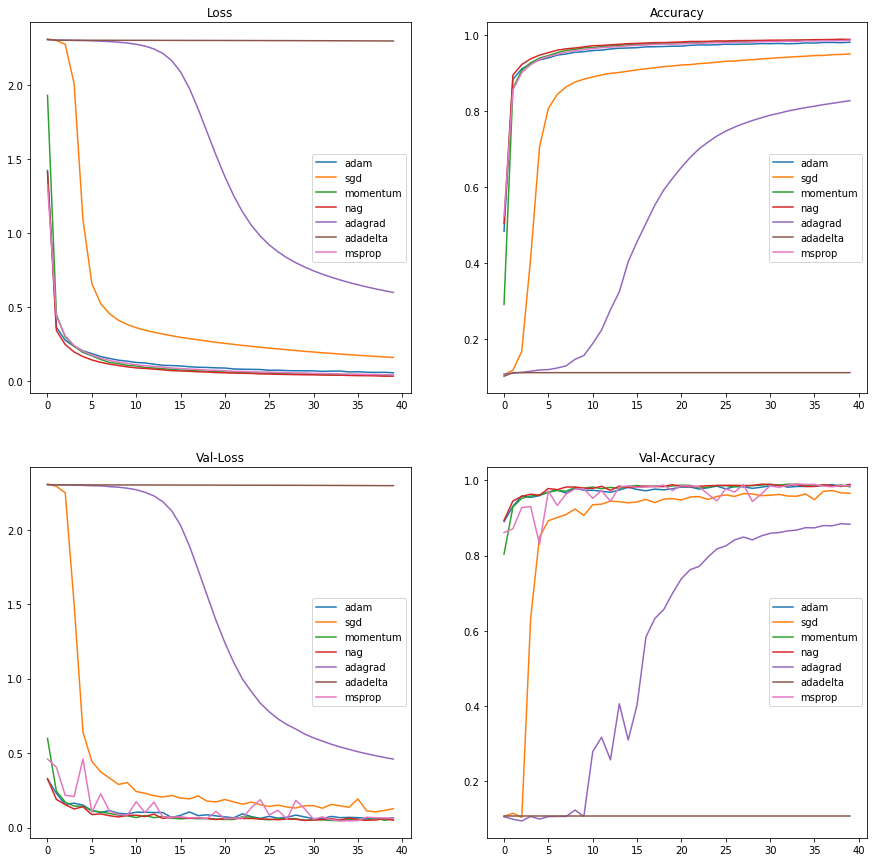

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0][0].plot(adam_history.history['loss'])
axs[0][1].plot(adam_history.history['accuracy'])
axs[1][0].plot(adam_history.history['val_loss'])
axs[1][1].plot(adam_history.history['val_accuracy'])

axs[0][0].plot(SGD_history.history['loss'])
axs[0][1].plot(SGD_history.history['accuracy'])
axs[1][0].plot(SGD_history.history['val_loss'])
axs[1][1].plot(SGD_history.history['val_accuracy'])

axs[0][0].plot(Momentum_history.history['loss'])
axs[0][1].plot(Momentum_history.history['accuracy'])
axs[1][0].plot(Momentum_history.history['val_loss'])
axs[1][1].plot(Momentum_history.history['val_accuracy'])

axs[0][0].plot(Nest_history.history['loss'])
axs[0][1].plot(Nest_history.history['accuracy'])
axs[1][0].plot(Nest_history.history['val_loss'])
axs[1][1].plot(Nest_history.history['val_accuracy'])

axs[0][0].plot(Adagrad_history.history['loss'])
axs[0][1].plot(Adagrad_history.history['accuracy'])
axs[1][0].plot(Adagrad_history.history['val_loss'])
axs[1][1].plot(Adagrad_history.history['val_accuracy'])

axs[0][0].plot(Adadelta_history.history['loss'])
axs[0][1].plot(Adadelta_history.history['accuracy'])
axs[1][0].plot(Adadelta_history.history['val_loss'])
axs[1][1].plot(Adadelta_history.history['val_accuracy'])

axs[0][0].plot(RMSprop_history.history['loss'])
axs[0][1].plot(RMSprop_history.history['accuracy'])
axs[1][0].plot(RMSprop_history.history['val_loss'])
axs[1][1].plot(RMSprop_history.history['val_accuracy'])

axs[0][0].title.set_text('Loss')
axs[0][1].title.set_text('Accuracy')
axs[1][0].title.set_text('Val-Loss')
axs[1][1].title.set_text('Val-Accuracy')

axs[0][0].legend(['adam', 'sgd', 'momentum', 'nag', 'adagrad', 'adadelta', 'msprop'])
axs[0][1].legend(['adam', 'sgd', 'momentum', 'nag', 'adagrad', 'adadelta', 'msprop'])
axs[1][0].legend(['adam', 'sgd', 'momentum', 'nag', 'adagrad', 'adadelta', 'msprop'])
axs[1][1].legend(['adam', 'sgd', 'momentum', 'nag', 'adagrad', 'adadelta', 'msprop'])